In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

import numpy as np

import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from helper_functions import plot_decision_boundary, accuracy_fn
from three_way_plotter import plot_decision_boundary_3w

from collections import Counter

from models_loss_optim import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

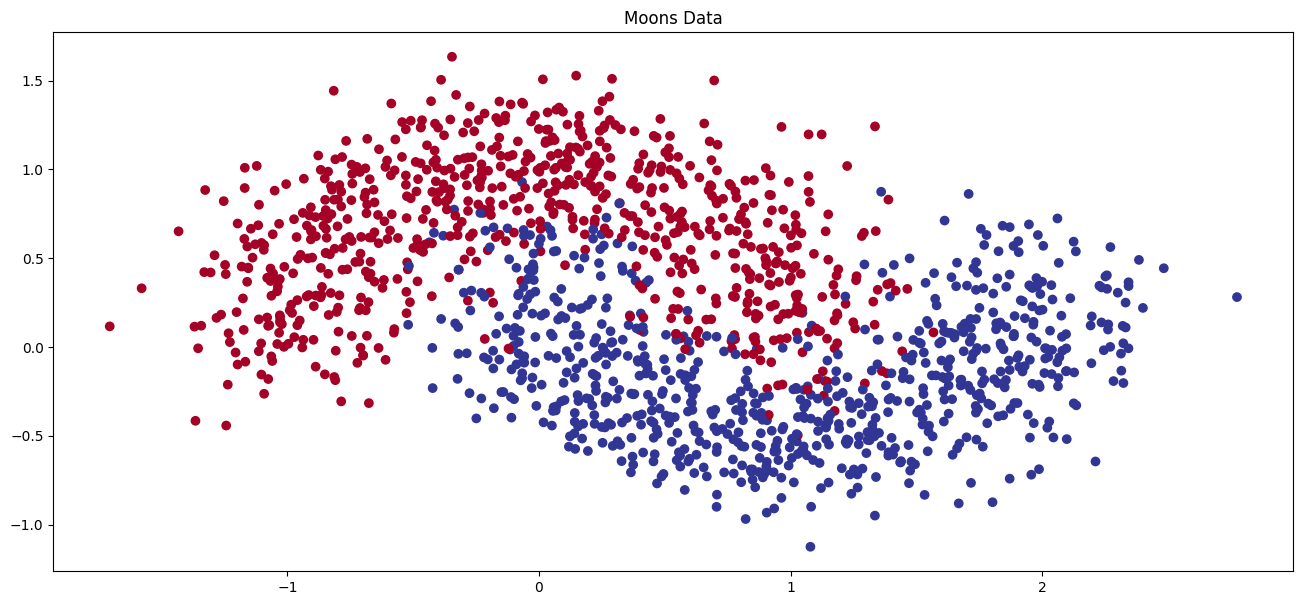

In [3]:

X_moon, y_moon = make_moons(n_samples=1500, 
                            noise=0.25, 
                            random_state=50, 
                            shuffle=True)

fig = plt.figure(figsize=(16, 7))
plt.title("Moons Data")
plt.scatter(X_moon[:, 0],
            X_moon[:, 1],
            c=y_moon,
            cmap=plt.cm.RdYlBu);

In [4]:
class_counts = Counter(y_moon)
print(class_counts)

Counter({0: 750, 1: 750})


In [5]:
number_classes = set(y_moon)
print(f"Number of classes: {len(number_classes)}  Class labels: {number_classes}")

Number of classes: 2  Class labels: {0, 1}


In [6]:
count_0 = 0
count_1 = 0
for label in y_moon:
    if label == 0:
        count_0 += 1
    else:
        count_1 += 1
print(f"Number of 0 labels: {count_0}")
print(f"Number of 1 labels: {count_1}")

Number of 0 labels: 750
Number of 1 labels: 750


In [7]:
print(f"Content Sample X_moon:\n {X_moon[:5]}\n")
print(f"Content Sample y_moon:\n {y_moon[:5]}\n")
print(f"Data-Type: {type(X_moon)} | Size: {X_moon.shape} | Content-Type: {X_moon.dtype}")
print(f"Data-Type: {type(y_moon)} | Size: {y_moon.shape} | Content-Type: {y_moon.dtype}")

Content Sample X_moon:
 [[ 0.8528832   0.81065309]
 [ 1.82551477 -0.39020302]
 [-0.80961778  1.0566284 ]
 [-1.12202003  1.01947703]
 [ 0.43076532 -0.10015411]]

Content Sample y_moon:
 [0 1 0 0 1]

Data-Type: <class 'numpy.ndarray'> | Size: (1500, 2) | Content-Type: float64
Data-Type: <class 'numpy.ndarray'> | Size: (1500,) | Content-Type: int64


In [8]:
X_moon = torch.from_numpy(X_moon).type(torch.float32)
y_moon = torch.from_numpy(y_moon).type(torch.float32)

In [9]:
print(f"Data-Type: {type(X_moon)} | Size: {X_moon.shape} | Content-Type: {X_moon.dtype}")
print(f"Data-Type: {type(y_moon)} | Size: {y_moon.shape} | Content-Type: {y_moon.dtype}")

Data-Type: <class 'torch.Tensor'> | Size: torch.Size([1500, 2]) | Content-Type: torch.float32
Data-Type: <class 'torch.Tensor'> | Size: torch.Size([1500]) | Content-Type: torch.float32


In [10]:
X_hold, X_test, y_hold, y_test = train_test_split(X_moon, y_moon, 
                                                  test_size=0.1, 
                                                  random_state=50, 
                                                  stratify=y_moon)

In [11]:
print(X_hold.shape, y_hold.shape)
print(X_test.shape, y_test.shape)

torch.Size([1350, 2]) torch.Size([1350])
torch.Size([150, 2]) torch.Size([150])


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_hold, y_hold,
                                                  test_size=0.2, random_state=50,
                                                  stratify=y_hold)

In [13]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

torch.Size([1080, 2]) torch.Size([1080])
torch.Size([270, 2]) torch.Size([270])
torch.Size([150, 2]) torch.Size([150])


In [14]:
train_set = TensorDataset(X_train, y_train)
val_set = TensorDataset(X_val, y_val)
test_set = TensorDataset(X_test, y_test)

In [15]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64)
test_loader = DataLoader(test_set, batch_size=64)

In [16]:
def model_info(model):
    model_architecture = str(model).replace("(", " ").replace(")", " ")
    model_name = model.__class__.__name__
    return model_architecture, model_name

moon_model_V1_1_architecture, V1_1_name = model_info(moon_model_V1_1)
moon_model_V1_2_architecture, V1_2_name = model_info(moon_model_V1_2)

moon_model_V2_1_architecture, V2_1_name = model_info(moon_model_V2_1)
moon_model_V2_2_architecture, V2_2_name = model_info(moon_model_V2_2)

moon_model_V3_1_architecture, V3_1_name = model_info(moon_model_V3_1)
moon_model_V3_2_architecture, V3_2_name = model_info(moon_model_V3_2)


In [17]:
print(f"Loos function loss_fn_1: {loss_fn_1}")
print(f"Loss function loss_fn_2: {loss_fn_2}")

Loos function loss_fn_1: BCEWithLogitsLoss()
Loss function loss_fn_2: CrossEntropyLoss()


In [18]:
def optimizer_info(optimizer):
    optimizer_name = optimizer.__class__.__name__
    learning_rate = optimizer.param_groups[0]["lr"]
    return optimizer_name, learning_rate

adam_001_V1_1 = optimizer_setup_Adam(moon_model_V1_1, 0.01)
adam_001_V1_2 = optimizer_setup_Adam(moon_model_V1_2, 0.01)

adam_001_V2_1 = optimizer_setup_Adam(moon_model_V2_1, 0.01)
adam_001_V2_2 = optimizer_setup_Adam(moon_model_V2_2, 0.01)

adam_001_V3_1 = optimizer_setup_Adam(moon_model_V3_1, 0.01)
adam_001_V3_2 = optimizer_setup_Adam(moon_model_V3_2, 0.01)

In [19]:
adam_001_data = optimizer_info(adam_001_V1_1)

In [20]:
def train_step(model, loss_fn, accuracy_fn, optimizer, dataloader):
    model.train()
    total_loss = 0.0
    total_acc = 0.0
    num_batches = 0

    for X_train_batch, y_train_batch in dataloader:
        y_logits = model(X_train_batch).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))

        loss = loss_fn(y_logits, y_train_batch)
        acc = accuracy_fn(y_train_batch, y_pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_acc += acc
        num_batches += 1

    return total_loss / num_batches, total_acc / num_batches

In [21]:
def val_step(model, loss_fn, accuracy_fn, dataloader):
    model.eval()
    total_val_loss = 0.0
    total_val_acc = 0.0
    num_batches = 0

    with torch.inference_mode():
        for X_val_batch, y_val_batch in dataloader:
            val_logits = model(X_val_batch).squeeze()
            val_pred = torch.round(torch.sigmoid(val_logits))

            val_loss = loss_fn(val_logits, y_val_batch)
            val_acc = accuracy_fn(y_val_batch, val_pred)

            total_val_loss += val_loss.item()
            total_val_acc += val_acc
            num_batches += 1
    
    return total_val_loss / num_batches, total_val_acc / num_batches

In [22]:
def run_experiment(model, loss_fn, accuracy_fn, optimizer, 
                   train_loader, val_loader, 
                   num_epochs, print_freq, device):
    torch.manual_seed(50)
    torch.cuda.manual_seed(50)

    epochs_count = []
    loss_values = []
    acc_values = []
    val_loss_values = []
    val_acc_values = []

    for epoch in range(num_epochs):
        loss, acc = train_step(model, loss_fn, accuracy_fn, optimizer,
                               train_loader)
        val_loss, val_acc = val_step(model, loss_fn, accuracy_fn,
                                     val_loader)
        
        if epoch % print_freq == 0:
            epochs_count.append(epoch)
            loss_values.append(loss)
            acc_values.append(acc)
            val_loss_values.append(val_loss)
            val_acc_values.append(val_acc)
            print(f"Epoch: {epoch} | Loss: {loss:.3f} | Acc: {acc:.3f} | Val Loss: {val_loss:.3f} | Val Acc: {val_acc:.3f}")
    return epochs_count, loss_values, acc_values, val_loss_values, val_acc_values

In [23]:
epochs_count_V1, loss_values_V1_1op1, acc_values_V1_1op1, val_loss_values_V1_1op1, val_acc_values_V1_1op1 = run_experiment(moon_model_V1_1, loss_fn_1, 
                                                                                                                           accuracy_fn, adam_001_V1_1, 
                                                                                                                           train_loader, val_loader, 1050, 50, 
                                                                                                                           device=None)

Epoch: 0 | Loss: 0.612 | Acc: 70.588 | Val Loss: 0.513 | Val Acc: 78.438
Epoch: 50 | Loss: 0.140 | Acc: 94.105 | Val Loss: 0.207 | Val Acc: 91.205
Epoch: 100 | Loss: 0.134 | Acc: 94.118 | Val Loss: 0.206 | Val Acc: 90.893
Epoch: 150 | Loss: 0.130 | Acc: 94.105 | Val Loss: 0.210 | Val Acc: 91.205
Epoch: 200 | Loss: 0.131 | Acc: 93.803 | Val Loss: 0.215 | Val Acc: 91.518
Epoch: 250 | Loss: 0.132 | Acc: 94.275 | Val Loss: 0.208 | Val Acc: 91.518
Epoch: 300 | Loss: 0.135 | Acc: 94.091 | Val Loss: 0.215 | Val Acc: 91.518
Epoch: 350 | Loss: 0.129 | Acc: 94.183 | Val Loss: 0.214 | Val Acc: 91.518
Epoch: 400 | Loss: 0.129 | Acc: 94.433 | Val Loss: 0.216 | Val Acc: 91.518
Epoch: 450 | Loss: 0.128 | Acc: 94.420 | Val Loss: 0.219 | Val Acc: 91.518
Epoch: 500 | Loss: 0.128 | Acc: 94.328 | Val Loss: 0.222 | Val Acc: 91.518
Epoch: 550 | Loss: 0.133 | Acc: 94.157 | Val Loss: 0.218 | Val Acc: 91.205
Epoch: 600 | Loss: 0.127 | Acc: 94.735 | Val Loss: 0.217 | Val Acc: 90.893
Epoch: 650 | Loss: 0.134 | A

In [24]:
def collecting_final_values(losses, accs, val_losses, val_accs):
    final_loss = losses[-1]
    final_acc = accs[-1]
    final_val_loss = val_losses[-1]
    final_val_acc = val_accs[-1]
    return final_loss, final_acc, final_val_loss, final_val_acc
final_loss_V1_1op1, final_acc_V1_1op1, final_val_loss_V1_1op1, final_val_acc_V1_1op1 = collecting_final_values(loss_values_V1_1op1, acc_values_V1_1op1, 
                                                                                                               val_loss_values_V1_1op1, val_acc_values_V1_1op1)

In [25]:
def adding_to_results_dict(model__name, final__loss, final__acc, final__val_loss, final__val_acc):
    return {
        "Model": model__name,
        "Final Loss": final__loss,
        "Final Acc": final__acc,
        "Final Val Loss": final__val_loss,
        "Final Val Acc": final__val_acc
    }

In [26]:
def plot_graphs(model_architecture, loss_fn, optimizer, learning_rate, 
                final_loss, final_acc, final_val_loss, final_val_acc, 
                loss_values, acc_values, val_loss_values, val_acc_values, 
                epochs_count):
    fig = plt.figure(figsize=(16, 7))
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.title(f"{model_architecture}Train vs Val Loss")
    plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label=f"Train Loss: {final_loss:.5f}")
    plt.plot(epochs_count, np.array(torch.tensor(val_loss_values).numpy()), label=f"Validation Loss: {final_val_loss:.5f}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.grid(True)
    plt.title(f"{loss_fn}\nOptimizer: {optimizer}\nLearning Rate: {learning_rate}\n\nTrain vs Validation Acc")
    plt.plot(epochs_count, np.array(torch.tensor(acc_values).numpy()), label=f"Train Acc: {final_acc:.5f}")
    plt.plot(epochs_count, np.array(torch.tensor(val_acc_values).numpy()), label=f"Validation Acc: {final_val_acc:.5f}")
    plt.xlabel("Epoch")
    plt.ylabel("Acc")
    plt.legend()
    return fig

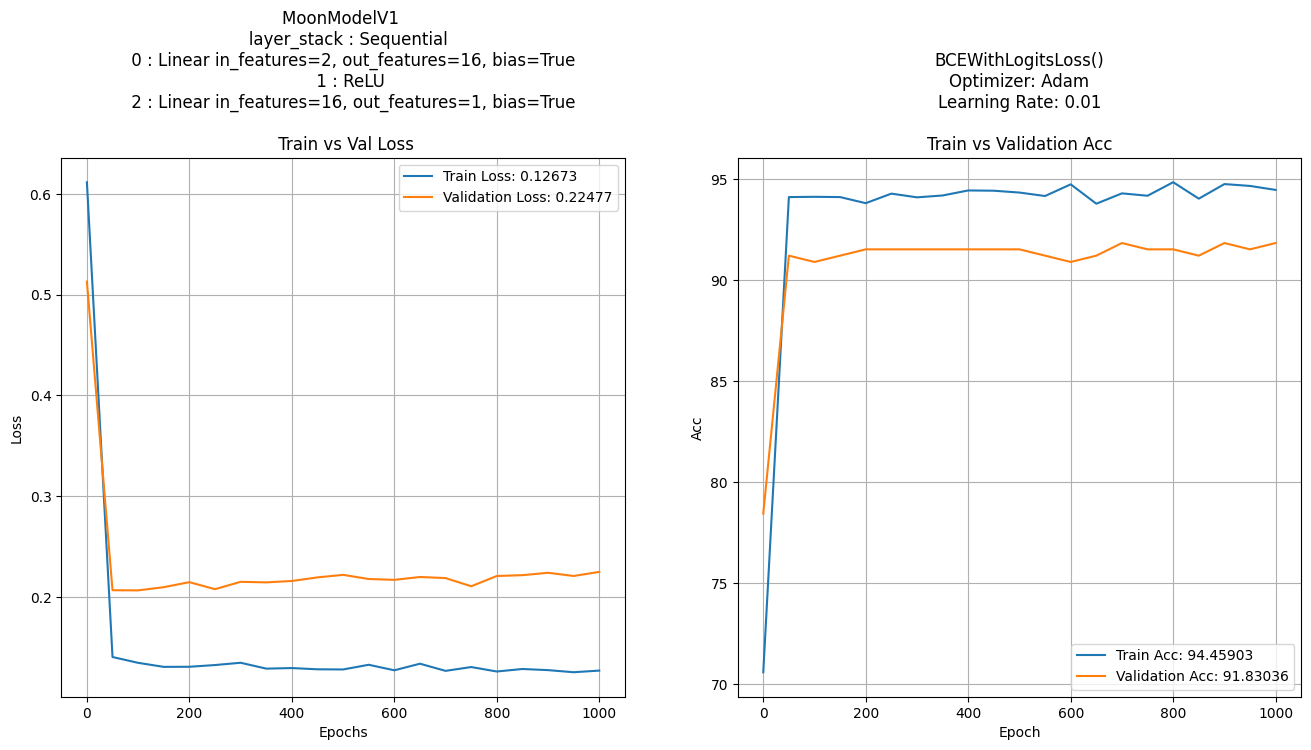

In [27]:
moon_model_V1_1_graphs = plot_graphs(moon_model_V1_1_architecture, loss_fn_1, 
                                     adam_001_data[0], adam_001_data[1], 
                                     final_loss_V1_1op1, final_acc_V1_1op1, 
                                     final_val_loss_V1_1op1, final_val_acc_V1_1op1, 
                                     loss_values_V1_1op1, acc_values_V1_1op1, 
                                     val_loss_values_V1_1op1, val_acc_values_V1_1op1, 
                                     epochs_count_V1)

In [28]:
results_V1_1 = adding_to_results_dict(V1_1_name, final_loss_V1_1op1, final_acc_V1_1op1, final_val_loss_V1_1op1, final_val_acc_V1_1op1)
results_V1_1

{'Model': 'MoonModelV1',
 'Final Loss': 0.12673130675273783,
 'Final Acc': 94.45903361344537,
 'Final Val Loss': 0.22477193027734757,
 'Final Val Acc': 91.83035714285714}

Epoch: 0 | Loss: 0.515 | Acc: 74.803 | Val Loss: 0.373 | Val Acc: 84.688
Epoch: 50 | Loss: 0.133 | Acc: 94.288 | Val Loss: 0.228 | Val Acc: 88.839
Epoch: 100 | Loss: 0.128 | Acc: 94.288 | Val Loss: 0.231 | Val Acc: 88.661
Epoch: 150 | Loss: 0.124 | Acc: 94.735 | Val Loss: 0.226 | Val Acc: 89.777
Epoch: 200 | Loss: 0.125 | Acc: 94.551 | Val Loss: 0.227 | Val Acc: 90.580
Epoch: 250 | Loss: 0.127 | Acc: 94.367 | Val Loss: 0.238 | Val Acc: 89.286
Epoch: 300 | Loss: 0.129 | Acc: 94.735 | Val Loss: 0.237 | Val Acc: 88.661
Epoch: 350 | Loss: 0.122 | Acc: 95.011 | Val Loss: 0.236 | Val Acc: 88.973
Epoch: 400 | Loss: 0.129 | Acc: 94.433 | Val Loss: 0.254 | Val Acc: 89.777
Epoch: 450 | Loss: 0.122 | Acc: 94.892 | Val Loss: 0.249 | Val Acc: 89.777
Epoch: 500 | Loss: 0.119 | Acc: 94.787 | Val Loss: 0.252 | Val Acc: 90.089
Epoch: 550 | Loss: 0.131 | Acc: 94.170 | Val Loss: 0.268 | Val Acc: 91.830
Epoch: 600 | Loss: 0.120 | Acc: 94.262 | Val Loss: 0.254 | Val Acc: 90.089
Epoch: 650 | Loss: 0.120 | A

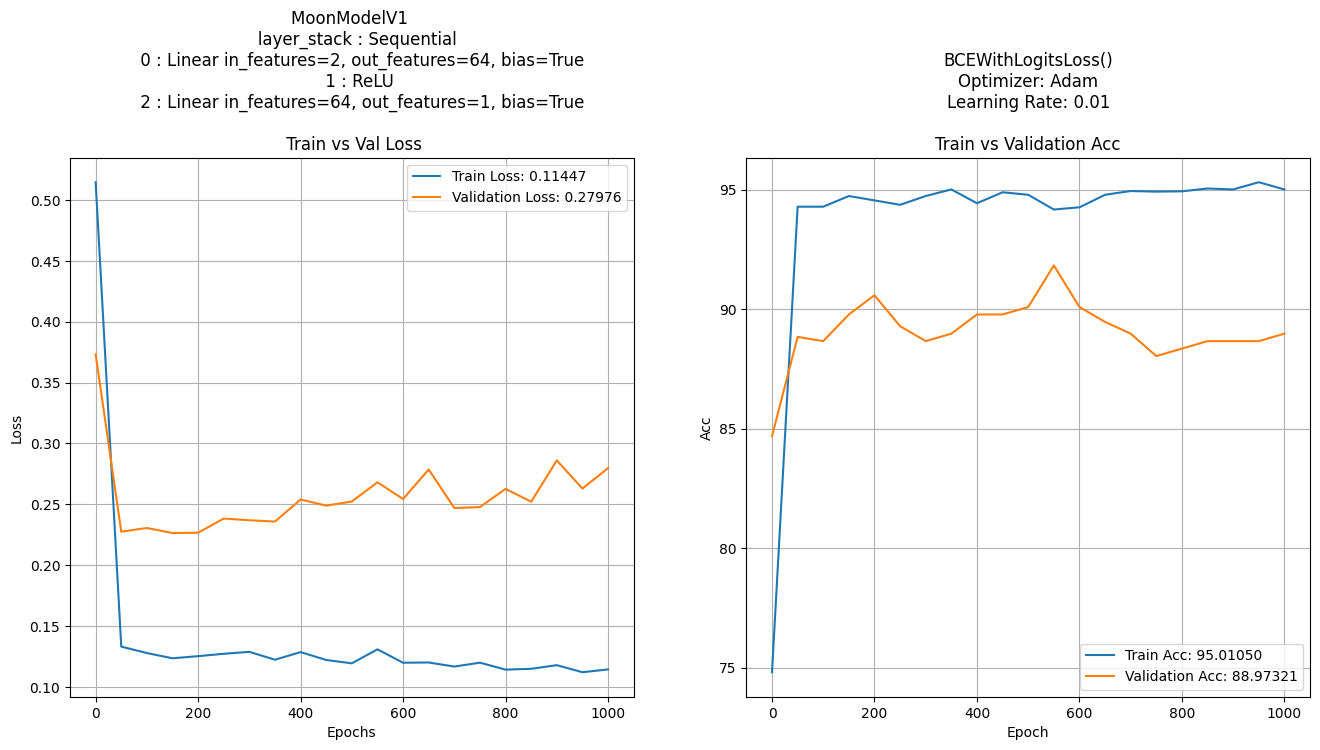

In [29]:
epochs_count_V1, loss_values_V1_2op1, acc_values_V1_2op1, val_loss_values_V1_2op1, val_acc_values_V1_2op1 = run_experiment(moon_model_V1_2, loss_fn_1, accuracy_fn, adam_001_V1_2, 
                                                                                                                           train_loader, val_loader, 1050, 50, device=None)

final_loss_V1_2op1, final_acc_V1_2op1, final_val_loss_V1_2op1, final_val_acc_V1_2op1 = collecting_final_values(loss_values_V1_2op1, acc_values_V1_2op1, 
                                                                                                               val_loss_values_V1_2op1, val_acc_values_V1_2op1)

moon_model_V1_2_graphs = plot_graphs(moon_model_V1_2_architecture, loss_fn_1, 
                                     adam_001_data[0], adam_001_data[1], 
                                     final_loss_V1_2op1, final_acc_V1_2op1, 
                                     final_val_loss_V1_2op1, final_val_acc_V1_2op1, 
                                     loss_values_V1_2op1, acc_values_V1_2op1, 
                                     val_loss_values_V1_2op1, val_acc_values_V1_2op1, 
                                     epochs_count_V1)

In [30]:
results_V1_2 = adding_to_results_dict(V1_2_name, final_loss_V1_2op1, final_acc_V1_2op1, final_val_loss_V1_2op1, final_val_acc_V1_2op1)
results_V1_2

{'Model': 'MoonModelV1',
 'Final Loss': 0.11446763290201917,
 'Final Acc': 95.01050420168066,
 'Final Val Loss': 0.2797613926231861,
 'Final Val Acc': 88.97321428571429}